## This part of the code is for: 

###### 1) read the csv file that contains the data
###### 2) convert to timestamp format the text data in som columns
###### 3) construct a dataframe with the timestamp split columns for year, month, day, hour, minutes, seconds
###### 4) determine the duration of the event
###### 5) determine in which season the event occurred to use within the team
###### 6) determine the distribution of accident slow-downs per month of the year
###### 7)determine if the number of accidents is related to pay-day, assuming that pay-day is Friday
###### 8) determine if the day of the month has an effect on the count of slow-downs, particularly at the end of the month

In [2]:
#import Dependencies
import pandas as pd
import csv

import time 
import datetime
import numpy as np
from datetime import date



In [3]:
#Read database
path="C://Users//oorte//Documents//RICE-CLASS-MATERIAL//team3//US_Accidents_June20.csv"
traffic_df = pd.read_csv(path)

In [4]:
#Display the header of the csv file
traffic_df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
# Read strings representing Start and End of event because they will be used later
date_start=traffic_df["Start_Time"]
date_end=traffic_df["End_Time"]


In [6]:
#convert string of characters to datetime object
traffic_df['start']=pd.DataFrame(pd.to_datetime(date_start, format='%Y-%m-%d %H:%M:%S'))
traffic_df['end']=pd.DataFrame(pd.to_datetime(date_end, format='%Y-%m-%d %H:%M:%S'))
dfa = pd.DataFrame(traffic_df['start'])
dfb = pd.DataFrame(traffic_df['end'])


In [7]:
#Convert timestamp to integer for mathematical operations
traffic_df['tss'] = dfa.iloc[:].apply(lambda x: x['start'].timestamp(), axis=1).astype(int)
traffic_df['tse'] = dfb.iloc[:].apply(lambda x: x['end'].timestamp(), axis=1).astype(int)


In [8]:
#create additional columns with datetime object split
traffic_df['year_start'] = pd.DatetimeIndex(traffic_df['start']).year
traffic_df['year_end'] = pd.DatetimeIndex(traffic_df['end']).year

traffic_df['month_start'] = pd.DatetimeIndex(traffic_df['start']).month
traffic_df['month_end'] = pd.DatetimeIndex(traffic_df['end']).month

traffic_df['day_start'] = pd.DatetimeIndex(traffic_df['start']).day
traffic_df['day_end'] = pd.DatetimeIndex(traffic_df['end']).day

traffic_df['time_start'] = pd.DatetimeIndex(traffic_df['start']).time
traffic_df['time_end'] = pd.DatetimeIndex(traffic_df['end']).time


In [9]:
#create additional columns for hour, minutes, seconds
traffic_df['h_start'] = pd.DatetimeIndex(traffic_df['start']).hour
traffic_df['h_end'] = pd.DatetimeIndex(traffic_df['end']).hour

traffic_df['m_start'] = pd.DatetimeIndex(traffic_df['start']).minute
traffic_df['m_end'] = pd.DatetimeIndex(traffic_df['end']).minute

traffic_df['s_start'] = pd.DatetimeIndex(traffic_df['start']).second
traffic_df['s_end'] = pd.DatetimeIndex(traffic_df['end']).second


In [10]:
#calculate the second that the traffic event started and ended
traffic_df["sec_start"]=traffic_df['h_start']*60*60+traffic_df['m_start']*60+traffic_df['s_start']*1
traffic_df["sec_end"]=traffic_df['h_end']*60*60+traffic_df['m_end']*60+traffic_df['s_end']*1

In [11]:
#calculate the duration of the event
traffic_df["duration"]=traffic_df['tse']-traffic_df['tss']


In [12]:
#add additional columns needed for seasons determinations
traffic_df['season_start']=traffic_df['month_start']
traffic_df['season_end']=traffic_df['month_end']

In [13]:
#Determine the day of the week
traffic_df['day_of_week'] = traffic_df['start'].dt.day_name()


In [14]:
#seasons definitions (by month)
traffic_df.loc[traffic_df.season_start == 1, "season_start"] = "winter"
traffic_df.loc[traffic_df.season_start == 2, "season_start"] = "winter"
traffic_df.loc[traffic_df.season_start == 12, "season_start"] = "winter"
traffic_df.loc[traffic_df.season_start == 3, "season_start"] = "spring"
traffic_df.loc[traffic_df.season_start == 4, "season_start"] = "spring"
traffic_df.loc[traffic_df.season_start == 5, "season_start"] = "spring"
traffic_df.loc[traffic_df.season_start == 6, "season_start"] = "summer"
traffic_df.loc[traffic_df.season_start == 7, "season_start"] = "summer"
traffic_df.loc[traffic_df.season_start == 8, "season_start"] = "summer"
traffic_df.loc[traffic_df.season_start == 9, "season_start"] = "fall"
traffic_df.loc[traffic_df.season_start == 10, "season_start"] = "fall"
traffic_df.loc[traffic_df.season_start == 11, "season_start"] = "fall"

In [15]:
#Group dataframe according to season
seasons_accidents_df=pd.DataFrame((pd.DataFrame(traffic_df.groupby(['season_start']).count())).iloc[:,1])
seasons_accidents_df.columns=['count']

seasons_accidents_df.reset_index()


,season_start,count
0,fall,916021
1,spring,889432
2,summer,822220
3,winter,885944


In [16]:
#New dependencies for plotting
import matplotlib.pyplot as plt

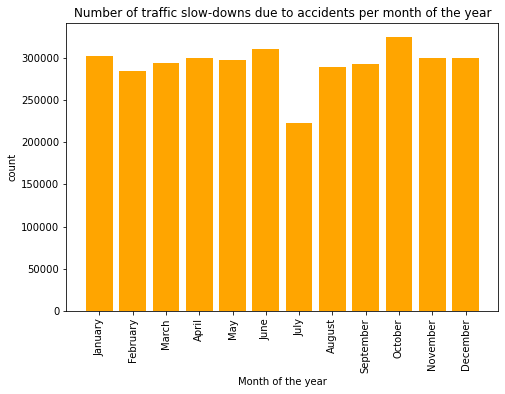

In [26]:
# Generate a bar plot showing the total number of traffic slow downs related to accidents per month.

fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
Month = ['January','February','March','April','May','June','July','August','September','October','November','December']
count = month_accidents_df['count']
ax.bar(Month,count)
plt.bar(Month, count, color='orange')
plt.xticks(rotation=90)
plt.xlabel("Month of the year")
plt.ylabel("count")
plt.title("Number of traffic slow-downs due to accidents per month of the year")
plt.show()

In [27]:
#Group dataframe according to day of the week
wday_accidents_df=pd.DataFrame((pd.DataFrame(traffic_df.groupby(['day_of_week']).count())).iloc[:,1])
wday_accidents_df.columns=['count']
wday_accidents_df.reset_index()
wday_accidents_df['count']


day_of_week
Friday       639706
Monday       592871
Saturday     214483
Sunday       189315
Thursday     621677
Tuesday      631136
Wednesday    624429
Name: count, dtype: int64

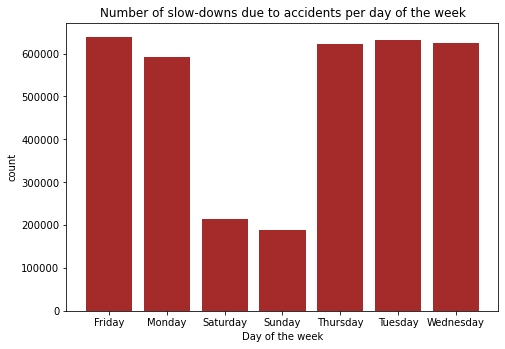

In [34]:
# Generate a bar plot showing the total number of accidents per day of the week.

fig3 = plt.figure()
ax = fig3.add_axes([0,0,1,1])
Day_of_Week = wday_accidents_df.index.tolist()
count = wday_accidents_df['count']
ax.bar(Day_of_Week,count)
plt.bar(Day_of_Week, count, color='brown')
plt.xlabel("Day of the week")
plt.ylabel("count")
plt.title("Number of slow-downs due to accidents per day of the week")
plt.show()

***This graph suggests that Friday is not very different in the number of traffic slow-downs due to accidents than other days of the standard work week. However, on weekends (Staurday and Sunday) slow-downs due to accidents are less frequent. One interpretation is that less people are driving and hence traffic is smoother on weekends. Curiously, on Mondays traffic slow-downs due to accidents is lower than any other day of the work week and perhaps this is due to higher degree of awareness and less fatigue at the start of the work week***

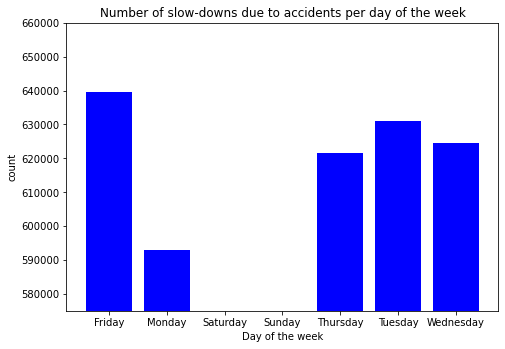

In [36]:
# Generate a bar plot showing the total number of accidents per day of the week with a different scale for added clarity.

fig4 = plt.figure()
ax = fig4.add_axes([0,0,1,1])
Day_of_Week = wday_accidents_df.index.tolist()
count = wday_accidents_df['count']
plt.ylim(575000,660000)
ax.bar(Day_of_Week,count)
plt.bar(Day_of_Week, count, color='blue')
plt.xlabel("Day of the week")
plt.ylabel("count")
plt.title("Number of slow-downs due to accidents per day of the week")
plt.show()

***When we use a different scale in the y axis the difference in number of slow-downs for the weekdays is clearer. Fridays indeed have the highest number of traffic slow downs and the reasons could vary, but certainly because Friday is often a payday drivers could drink more to celebrate the end of the work week***

In [59]:
#Group dataframe according to day of the month
mday_accidents_df=pd.DataFrame((pd.DataFrame(traffic_df.groupby(['day_start']).count())).iloc[:,1])
mday_accidents_df.columns=['count']
mday_accidents_df.reset_index()
mean=mday_accidents_df['count'].mean()
mean,mean/2, mday_accidents_df['count'][31],mday_accidents_df['count'][30]/2

(113342.48387096774, 56671.24193548387, 64517, 52112.5)

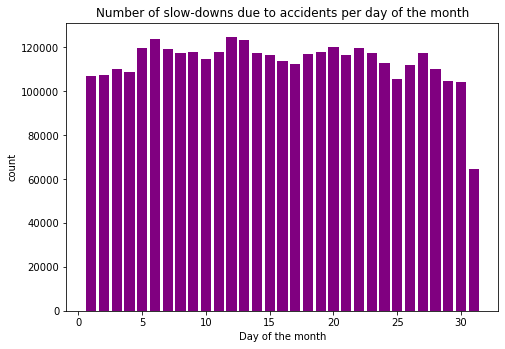

In [40]:
#
fig5 = plt.figure()
ax = fig5.add_axes([0,0,1,1])
Day_of_Month = mday_accidents_df.index.tolist()
count = mday_accidents_df['count']
ax.bar(Day_of_Month,count)
plt.bar(Day_of_Month, count, color='purple')
plt.xlabel("Day of the month")
plt.ylabel("count")
plt.title("Number of slow-downs due to accidents per day of the month")
plt.show()

***This graph suggests that most days of the calendar month have similar number of slow-downs due to accidents. Four months of the year have 30 days and seven months have 31 days, February has either 28 or 29 days. It is not very clear that the end of the month, a common payday, has a strong effect on the number of slow-downs due to accidents. The average of slow-downs due to accidents is not greater on a 30th day than any other day of the month, although the average number of slow-downs on the 31st could be (comparatively) greater than any other day of the month if we double the count observed***

In [23]:
#display header of current dataframe
traffic_df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,m_start,m_end,s_start,s_end,sec_start,sec_end,duration,season_start,season_end,day_of_week
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,46,0,0,0,20760,39600,18840,winter,2,Monday
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,7,37,59,59,22079,23879,1800,winter,2,Monday
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,49,19,27,27,24567,26367,1800,winter,2,Monday
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,23,53,34,34,26614,28414,1800,winter,2,Monday
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,39,9,7,7,27547,29347,1800,winter,2,Monday


In [24]:
#write out the file to a csv to share within the group
traffic_df.to_csv('outAll.csv', index=False)